<a href="https://colab.research.google.com/github/Zeiadhany21/AdvancedML/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [ ]:
from zipfile import ZipFile

with ZipFile('/content/Arabic Handwritten Digits Dataset CSV-20231219T140020Z-001.zip' , 'r') as zipObj:
  zipObj.extractall('/content/Arabic_Handwritten')

In [ ]:
x_train = pd.read_csv("/content/Arabic_Handwritten/Arabic Handwritten Digits Dataset CSV/Arabic Handwritten Digits Dataset CSV/csvTrainImages 60k x 784.csv", header=None)
y_train = pd.read_csv("/content/Arabic_Handwritten/Arabic Handwritten Digits Dataset CSV/Arabic Handwritten Digits Dataset CSV/csvTrainLabel 60k x 1.csv", header=None)
x_test = pd.read_csv("/content/Arabic_Handwritten/Arabic Handwritten Digits Dataset CSV/Arabic Handwritten Digits Dataset CSV/csvTestImages 10k x 784.csv", header=None)
y_test = pd.read_csv("/content/Arabic_Handwritten/Arabic Handwritten Digits Dataset CSV/Arabic Handwritten Digits Dataset CSV/csvTestLabel 10k x 1.csv", header=None)


In [ ]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# input layer
model.add(Flatten())
# hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
# output layer
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], run_eagerly=True)

model.fit(x_train, y_train, epochs=3)

print(model.evaluate(x_train, y_train))


Epoch 1/3
1875/1875 [==============================] - 209s 111ms/step - loss: 0.1824 - accuracy: 0.9471
Epoch 2/3
1875/1875 [==============================] - 200s 106ms/step - loss: 0.0552 - accuracy: 0.9868
Epoch 3/3
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0211 - accuracy: 0.9942
[0.021128565073013306, 0.9942166805267334]


In [ ]:
epochs = 3
batch_size = 128  # 64, 128, 256, 512

datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

train_gen = datagen.flow(x_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(x_test, y_test, batch_size=batch_size)

history = model.fit(train_gen, epochs=epochs, verbose=1, steps_per_epoch=x_train.shape[0] // batch_size,
                    validation_data=test_gen, validation_steps=x_test.shape[0] // batch_size)



Epoch 1/3
468/468 [==============================] - 138s 295ms/step - loss: 0.1266 - accuracy: 0.9683 - val_loss: 0.0800 - val_accuracy: 0.9786
Epoch 2/3
468/468 [==============================] - 136s 290ms/step - loss: 0.0712 - accuracy: 0.9821 - val_loss: 0.0499 - val_accuracy: 0.9861
Epoch 3/3
468/468 [==============================] - 130s 278ms/step - loss: 0.0583 - accuracy: 0.9852 - val_loss: 0.0552 - val_accuracy: 0.9860


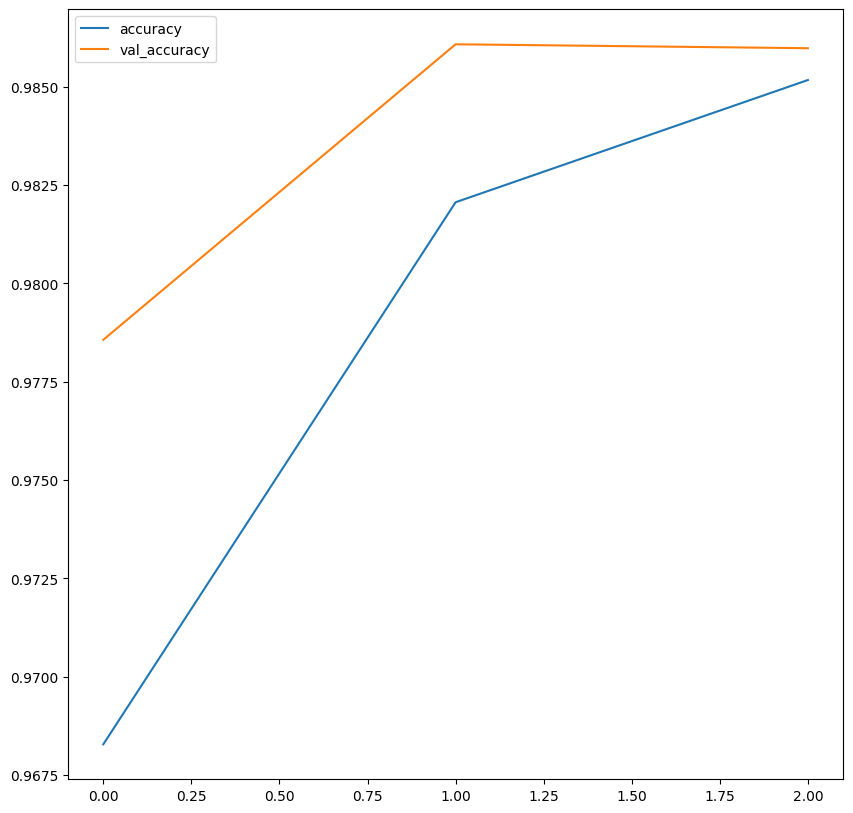

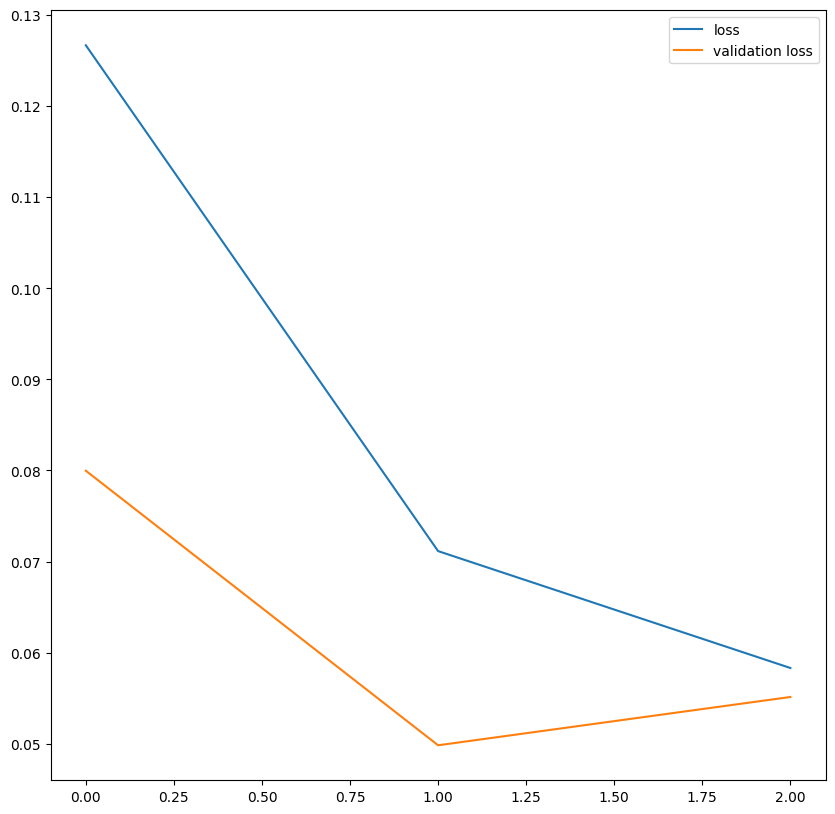

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(history.history["accuracy"], label='Training accuracy')
plt.plot(history.history["val_accuracy"], label='Validation accuracy')
plt.legend(["accuracy", "val_accuracy"])
plt.show()

plt.figure(figsize=(10, 10))
plt.plot(history.history["loss"], label='Loss')
plt.plot(history.history["val_loss"], label='Validation Loss')
plt.legend(["loss", "validation loss"])
plt.show()




In [ ]:
model.save("model1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred = model.predict(x_test)

313/313 [==============================] - 7s 22ms/step


In [ ]:
a = model.evaluate(x_test , y_test)

313/313 [==============================] - 11s 35ms/step - loss: 0.0441 - accuracy: 0.9896
